In [72]:
from pyannote.core import notebook, Segment
notebook.crop = Segment(0, 30)

# Applying a pretrained model

In this tutorial, you will learn how to apply `pyannote.audio` models on an audio file, whose manual annotation is depicted below

In [75]:
# clone pyannote-audio Github repository and update ROOT_DIR accordingly
ROOT_DIR = "/Users/bredin/Development/pyannote/pyannote-audio"
AUDIO_FILE = f"{ROOT_DIR}/tutorials/assets/sample.wav"

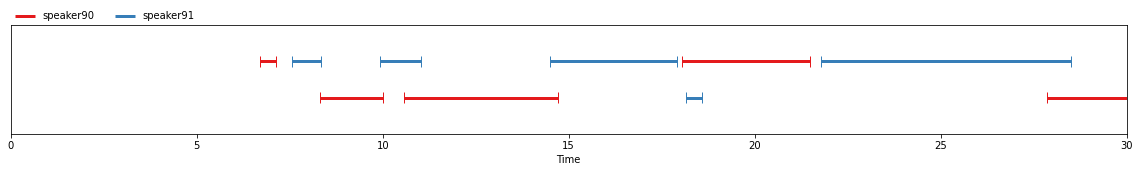

In [76]:
from pyannote.database.util import load_rttm
REFERENCE = f"{ROOT_DIR}/tutorials/assets/sample.rttm"
reference = load_rttm(REFERENCE)["sample"]
reference

## Loading models from 🤗 hub

Pretrained models are available on [🤗 Huggingface model hub](https://hf.co/models?other=pyannote-audio-model) and can be listed by looking for the [`pyannote-audio-model`](https://hf.co/models?other=pyannote-audio-model) tag.

In [41]:
from huggingface_hub import HfApi
available_models = [m.modelId for m in HfApi().list_models(filter="pyannote-audio-model")]
available_models

['pyannote/TestModelForContinuousIntegration',
 'pyannote/embedding',
 'pyannote/segmentation']

Let's load the speaker segmentation model...

In [68]:
from pyannote.audio import Inference
inference = Inference("pyannote/segmentation", duration=5.0, step=2.5)

`inference` can then be used to apply a model on the audio file using a 5s-long sliding window with a step of 2.5s:

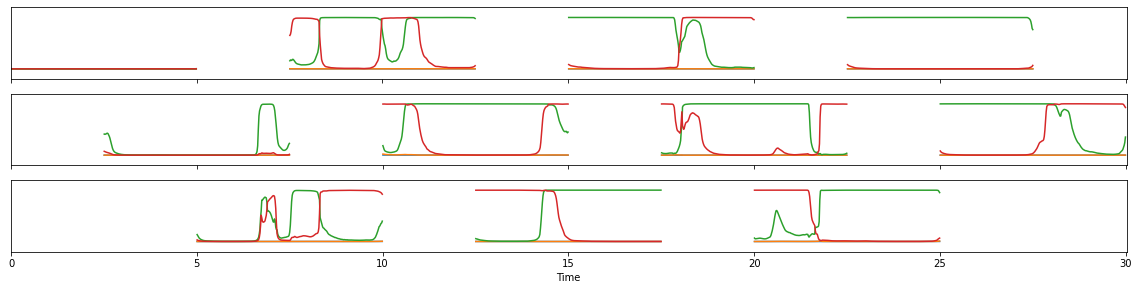

In [69]:
output = inference(AUDIO_FILE)
output

In [80]:
output.data.shape

(11, 293, 4)

For each of the 11 positions of the 5s window, the model outputs a 4-dimensional vector every 16ms (293 frames for 5 seconds), corresponding to the probabilities that each of (up to) 4 speakers is active.   

In [77]:
inference.model.specifications

Specifications(problem=<Problem.MULTI_LABEL_CLASSIFICATION: 2>, resolution=<Resolution.FRAME: 1>, duration=5.0, warm_up=(0.0, 0.0), classes=['speaker#1', 'speaker#2', 'speaker#3', 'speaker#4'], permutation_invariant=True)

What are we looking at? This is a visual representation of the 

Any model has a `specifications` attribute that describes the expected input/output of the model:

In [ ]:
specs = model.specifications
specs

Here, `model` expects 5s-long audio chunks (`specs.duration == 5.0`) as input and returns a sequence of 4-dimensional (`len(specs.classes) == 4`) frames (`specs.resolution == Resolution.FRAME`).

## Processing a file from memory

In case the audio file is not stored on disk, pipelines can also process audio provided as a `{"waveform": ..., "sample_rate": ...}` dictionary. 

In [ ]:
import torchaudio
waveform, sample_rate = torchaudio.load(AUDIO_FILE)

print(f"{type(waveform)=}")
print(f"{waveform.shape=}")
print(f"{waveform.dtype=}")

audio_in_memory = {"waveform": waveform, "sample_rate": sample_rate}

In [ ]:
output = inference(audio_in_memory)
output